In [89]:
from urllib.request import urlopen
import json
import plotly.express as px
import pandas as pd
import os
from pathlib import Path
import requests
import json


In [93]:
covid_timeline_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

In [212]:
covid_timeline_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,145,145,145,145,149,149,151,151,151,151
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,14,15,15,15,16,16,19
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,66,66,66,66,66,66,68,68,69,69


In [227]:
covid_timeline_tr = covid_timeline_df.transpose()

In [228]:
covid_timeline_tr.head(20)

,0,1,2,3,4,5,6,7,8,9,...,3251,3252,3253,3254,3255,3256,3257,3258,3259,3260
UID,16,316,580,630,850,84001001,84001003,84001005,84001007,84001009,...,84090056,84099999,84070004,84070005,84070015,84070016,84070017,84070018,84070019,84070020
iso2,AS,GU,MP,PR,VI,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
iso3,ASM,GUM,MNP,PRI,VIR,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
code3,16,316,580,630,850,840,840,840,840,840,...,840,840,840,840,840,840,840,840,840,840
FIPS,60,66,69,72,78,1001,1003,1005,1007,1009,...,90056,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Admin2,NaN,NaN,NaN,NaN,NaN,Autauga,Baldwin,Barbour,Bibb,Blount,...,Unassigned,NaN,Michigan Department of Corrections (MDOC),Federal Correctional Institution (FCI),Bear River,Central Utah,Southeast Utah,Southwest Utah,TriCounty,Weber-Morgan
Province_State,American Samoa,Guam,Northern Mariana Islands,Puerto Rico,Virgin Islands,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Grand Princess,Michigan,Michigan,Utah,Utah,Utah,Utah,Utah,Utah
Country_Region,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
Lat,-14.271,13.4443,15.0979,18.2208,18.3358,32.5395,30.7277,31.8683,32.9964,33.9821,...,0,0,0,0,41.5211,39.3723,38.9962,37.8545,40.1249,41.2712
Long_,-170.132,144.794,145.674,-66.5901,-64.8963,-86.6441,-87.7221,-85.3871,-87.1251,-86.5679,...,0,0,0,0,-113.083,-111.576,-110.701,-111.442,-109.517,-111.915


In [229]:
covid_timeline_tr.drop(['UID', 'iso2', 'iso3', 'code3','FIPS', 'Admin2','Province_State', 'Country_Region','Lat','Long_'], inplace = True)


In [236]:
covid_timeline_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,3251,3252,3253,3254,3255,3256,3257,3258,3259,3260
Combined_Key,"American Samoa, US","Guam, US","Northern Mariana Islands, US","Puerto Rico, US","Virgin Islands, US","Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US",...,"Unassigned, Wyoming, US","Grand Princess, US","Michigan Department of Corrections (MDOC), Mic...","Federal Correctional Institution (FCI), Michig...","Bear River, Utah, US","Central Utah, Utah, US","Southeast Utah, Utah, US","Southwest Utah, Utah, US","TriCounty, Utah, US","Weber-Morgan, Utah, US"
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
covid_timeline_tr.tail()

,0,1,2,3,4,5,6,7,8,9,...,3251,3252,3253,3254,3255,3256,3257,3258,3259,3260
5/7/20,0,149,15,2031,66,61,205,51,44,44,...,0,103,2036,106,64,27,12,132,14,173
5/8/20,0,151,15,2156,68,67,208,53,44,44,...,0,103,2124,109,66,27,13,138,14,184
5/9/20,0,151,16,2173,68,68,216,58,45,44,...,0,103,2136,110,71,27,13,155,16,188
5/10/20,0,151,16,2198,69,74,222,59,46,44,...,0,103,2138,110,78,28,13,164,16,194
5/11/20,0,151,19,2256,69,84,224,61,46,45,...,0,103,2139,114,81,28,14,170,16,197


In [ ]:
data_to_plot = timeline_df
px.scatter(data_to_plot, x="", y="deaths", animation_frame="Combined_key", animation_group="state",
           size="cases", color="fips", hover_name="state")
#            log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [97]:
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Set token using Plotly Express set function
px.set_mapbox_access_token(mapbox_token)

In [99]:
type(mapbox_token)

str

In [100]:
url = "https://covidtracking.com/api/us/daily"

In [101]:
# Add format specifier to request url
url = url + "?format=json"

In [102]:
requests.get(url)


<Response [200]>

In [103]:
response_data = requests.get(url)

In [104]:
response_content = response_data.content
response_content

b'[{"date":20200512,"states":56,"positive":1360705,"negative":8294334,"pending":1803,"hospitalizedCurrently":45199,"hospitalizedCumulative":142861,"inIcuCurrently":11708,"inIcuCumulative":5595,"onVentilatorCurrently":6615,"onVentilatorCumulative":559,"recovered":230287,"hash":"495f1f951ef9c77b1359d77ecae0ff25d2714286","dateChecked":"2020-05-12T20:00:00Z","death":76617,"hospitalized":142861,"total":9656842,"totalTestResults":9655039,"posNeg":9655039,"deathIncrease":1510,"hospitalizedIncrease":-3120,"negativeIncrease":286288,"positiveIncrease":20293,"totalTestResultsIncrease":306581},{"date":20200511,"states":56,"positive":1340412,"negative":8008046,"pending":1989,"hospitalizedCurrently":44191,"hospitalizedCumulative":145981,"inIcuCurrently":11147,"inIcuCumulative":6488,"onVentilatorCurrently":6350,"onVentilatorCumulative":551,"recovered":232733,"hash":"0046d89f39f6807e493544153c0907b7e01ca099","dateChecked":"2020-05-11T20:00:00Z","death":75107,"hospitalized":145981,"total":9350447,"tota

In [105]:
import json

# Formatting as json
data = response_data.json()

In [106]:
print(json.dumps(data, indent=4))

[
    {
        "date": 20200512,
        "states": 56,
        "positive": 1360705,
        "negative": 8294334,
        "pending": 1803,
        "hospitalizedCurrently": 45199,
        "hospitalizedCumulative": 142861,
        "inIcuCurrently": 11708,
        "inIcuCumulative": 5595,
        "onVentilatorCurrently": 6615,
        "onVentilatorCumulative": 559,
        "recovered": 230287,
        "hash": "495f1f951ef9c77b1359d77ecae0ff25d2714286",
        "dateChecked": "2020-05-12T20:00:00Z",
        "death": 76617,
        "hospitalized": 142861,
        "total": 9656842,
        "totalTestResults": 9655039,
        "posNeg": 9655039,
        "deathIncrease": 1510,
        "hospitalizedIncrease": -3120,
        "negativeIncrease": 286288,
        "positiveIncrease": 20293,
        "totalTestResultsIncrease": 306581
    },
    {
        "date": 20200511,
        "states": 56,
        "positive": 1340412,
        "negative": 8008046,
        "pending": 1989,
        "hospitalizedCurr

In [171]:
data_df = pd.DataFrame(data).set_index('date').sort_values(by='date', ascending=False)
data_df.tail()

,dateChecked,death,deathIncrease,hash,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,onVentilatorCurrently,pending,posNeg,positive,positiveIncrease,recovered,states,total,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
20200126,2020-01-26T21:00:00Z,NaN,0.0,49d7f7395cd6355c1cfd73e8f987b880a23b0806,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
20200125,2020-01-25T21:00:00Z,NaN,0.0,3397c4f4ae5bca7147c616b98530b573a34d53fe,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
20200124,2020-01-24T21:00:00Z,NaN,0.0,df62af08ca19261e649a2956caaa742afa10fba4,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
20200123,2020-01-23T21:00:00Z,NaN,0.0,990a02f183bd45edc0cc64e2e9cee81ade44e1d5,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
20200122,2020-01-22T21:00:00Z,NaN,NaN,6f126ac272c96ac177c9e7a012c1ad72635ef468,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,NaN,NaN,1,1,1,NaN


In [172]:
data_df = data_df.drop(['hash','dateChecked'], axis=1)
data_df.tail()

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,...,onVentilatorCurrently,pending,posNeg,positive,positiveIncrease,recovered,states,total,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
20200126,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
20200125,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
20200124,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
20200123,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
20200122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,NaN,NaN,1,1,1,NaN


In [173]:
pd.to_datetime(data_df.index, dayfirst=True)
data_df.head()

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,...,onVentilatorCurrently,pending,posNeg,positive,positiveIncrease,recovered,states,total,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
20200512,76617.0,1510.0,142861.0,142861.0,45199.0,-3120.0,5595.0,11708.0,8294334.0,286288.0,...,6615.0,1803.0,9655039,1360705,20293.0,230287.0,56,9656842,9655039,306581.0
20200511,75107.0,837.0,145981.0,145981.0,44191.0,1201.0,6488.0,11147.0,8008046.0,370691.0,...,6350.0,1989.0,9348458,1340412,17605.0,232733.0,56,9350447,9348458,388296.0
20200510,74270.0,979.0,144780.0,144780.0,44943.0,-2432.0,6445.0,11393.0,7637355.0,251950.0,...,6395.0,3095.0,8960162,1322807,21712.0,216169.0,56,8963257,8960162,273662.0
20200509,73291.0,1529.0,147212.0,147212.0,46637.0,5175.0,6367.0,11496.0,7385405.0,271315.0,...,6551.0,3054.0,8686500,1301095,25179.0,212534.0,56,8689554,8686500,296494.0
20200508,71762.0,1760.0,142037.0,142037.0,47718.0,6861.0,6294.0,11780.0,7114090.0,271366.0,...,6788.0,3307.0,8390006,1275916,27779.0,198993.0,56,8393313,8390006,299145.0


In [174]:
formatted_data = data_df.reset_index()
formatted_data.head()

,date,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,...,onVentilatorCurrently,pending,posNeg,positive,positiveIncrease,recovered,states,total,totalTestResults,totalTestResultsIncrease
0,20200512,76617.0,1510.0,142861.0,142861.0,45199.0,-3120.0,5595.0,11708.0,8294334.0,...,6615.0,1803.0,9655039,1360705,20293.0,230287.0,56,9656842,9655039,306581.0
1,20200511,75107.0,837.0,145981.0,145981.0,44191.0,1201.0,6488.0,11147.0,8008046.0,...,6350.0,1989.0,9348458,1340412,17605.0,232733.0,56,9350447,9348458,388296.0
2,20200510,74270.0,979.0,144780.0,144780.0,44943.0,-2432.0,6445.0,11393.0,7637355.0,...,6395.0,3095.0,8960162,1322807,21712.0,216169.0,56,8963257,8960162,273662.0
3,20200509,73291.0,1529.0,147212.0,147212.0,46637.0,5175.0,6367.0,11496.0,7385405.0,...,6551.0,3054.0,8686500,1301095,25179.0,212534.0,56,8689554,8686500,296494.0
4,20200508,71762.0,1760.0,142037.0,142037.0,47718.0,6861.0,6294.0,11780.0,7114090.0,...,6788.0,3307.0,8390006,1275916,27779.0,198993.0,56,8393313,8390006,299145.0


In [175]:
formatted_data.date = formatted_data.date.astype('str')


In [176]:
formatted_data['date'] = pd.to_datetime(formatted_data['date'])
formatted_data.head()

,date,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,...,onVentilatorCurrently,pending,posNeg,positive,positiveIncrease,recovered,states,total,totalTestResults,totalTestResultsIncrease
0,2020-05-12,76617.0,1510.0,142861.0,142861.0,45199.0,-3120.0,5595.0,11708.0,8294334.0,...,6615.0,1803.0,9655039,1360705,20293.0,230287.0,56,9656842,9655039,306581.0
1,2020-05-11,75107.0,837.0,145981.0,145981.0,44191.0,1201.0,6488.0,11147.0,8008046.0,...,6350.0,1989.0,9348458,1340412,17605.0,232733.0,56,9350447,9348458,388296.0
2,2020-05-10,74270.0,979.0,144780.0,144780.0,44943.0,-2432.0,6445.0,11393.0,7637355.0,...,6395.0,3095.0,8960162,1322807,21712.0,216169.0,56,8963257,8960162,273662.0
3,2020-05-09,73291.0,1529.0,147212.0,147212.0,46637.0,5175.0,6367.0,11496.0,7385405.0,...,6551.0,3054.0,8686500,1301095,25179.0,212534.0,56,8689554,8686500,296494.0
4,2020-05-08,71762.0,1760.0,142037.0,142037.0,47718.0,6861.0,6294.0,11780.0,7114090.0,...,6788.0,3307.0,8390006,1275916,27779.0,198993.0,56,8393313,8390006,299145.0


In [177]:
formatted_data.set_index('date', inplace = True)

In [178]:
formatted_data = formatted_data.sort_index()

In [179]:
snp500_df = pd.read_csv(Path("../Resources/SnP500_data.csv"), index_col='Dates', infer_datetime_format=True, parse_dates=True).sort_index(ascending = False)
snp500_df.tail()

,S&P 500 (^SPX) - Index Value
Dates,
1928-01-07,17.68
1928-01-06,17.66
1928-01-05,17.55
1928-01-04,17.72
1928-01-03,17.76


In [180]:
joined_df = pd.concat([snp500_df, formatted_data], axis='columns', join='inner').sort_index()
joined_df.tail()

,S&P 500 (^SPX) - Index Value,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,...,onVentilatorCurrently,pending,posNeg,positive,positiveIncrease,recovered,states,total,totalTestResults,totalTestResultsIncrease
2020-05-01,2830.71,59059.0,1739.0,121748.0,121748.0,52370.0,9761.0,4300.0,9205.0,5456921.0,...,4707.0,1639.0,6552602,1095681,33178.0,164015.0,56,6554241,6552602,296833.0
2020-05-04,2842.74,62780.0,912.0,127397.0,127397.0,50062.0,1601.0,4579.0,9366.0,6111921.0,...,4848.0,2791.0,7285374,1173453,21447.0,187180.0,56,7288165,7285374,232008.0
2020-05-05,2868.44,65307.0,2527.0,129357.0,129357.0,50906.0,1960.0,4794.0,9348.0,6348723.0,...,4818.0,2633.0,7544328,1195605,22152.0,189791.0,56,7546961,7544328,258954.0
2020-05-06,2848.42,67256.0,1949.0,131477.0,131477.0,50227.0,2120.0,4911.0,9380.0,6566236.0,...,4753.0,2742.0,7786793,1220557,24952.0,189910.0,56,7789535,7786793,242465.0
2020-05-07,2881.19,70002.0,2746.0,135176.0,135176.0,49130.0,3699.0,5174.0,12137.0,6842724.0,...,7070.0,3171.0,8090861,1248137,27580.0,195036.0,56,8094032,8090861,304068.0


In [204]:
data_to_plot = joined_df.reset_index()

data_to_plot.head()

,index,S&P 500 (^SPX) - Index Value,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,onVentilatorCurrently,pending,posNeg,positive,positiveIncrease,recovered,states,total,totalTestResults,totalTestResultsIncrease
0,2020-01-22,3321.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,NaN,NaN,1,1,1,NaN
1,2020-01-23,3325.54,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
2,2020-01-24,3295.47,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
3,2020-01-27,3243.63,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0
4,2020-01-28,3276.24,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,1,1,0.0,NaN,1,1,1,0.0


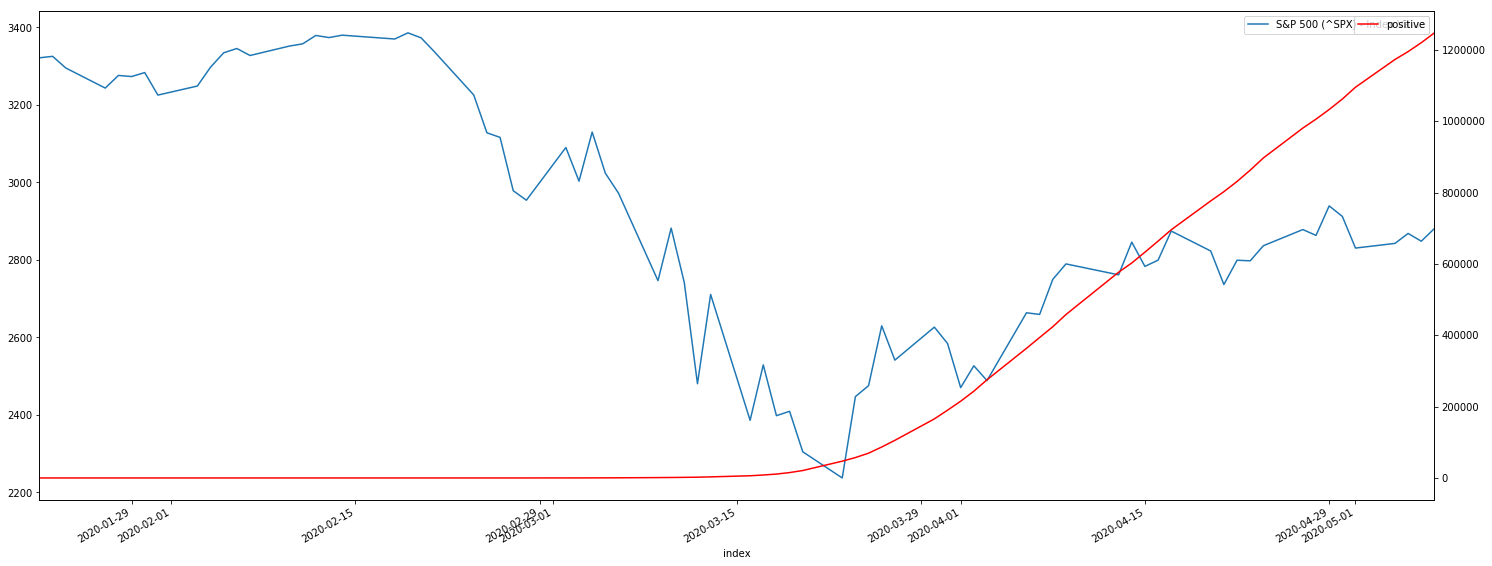

In [209]:

ax = data_to_plot.plot('index','S&P 500 (^SPX) - Index Value')
ax1 = ax.twinx()

data_to_plot.plot('index','positive', ax=ax1, color = 'r', figsize=(25,10))
